# Minggu 15 KMeans 

NIM     : 2041720140 <br>
Nama    : Ananda Ayu Sekar Wiranti <br>
Kelas   : TI-3A <br>

## Tugas

Buatlah sebuah model KMeans dengan ketentuan,

### 1. Gunakan data 'Mall_Customers.csv'

In [3]:
# Persiapan data
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

df = pd.read_csv('data/Mall_Customers.csv')

df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


### 2. Tentukan fitur apa yang tepat untuk melakukan clustering (minimal 2)

In [14]:
# Seleksi Fitur

X = df.iloc[:, 3:5]
y = df.iloc[:, -1]

X.head()

,Annual Income (k$),Spending Score (1-100)
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40


Plot cluster menggunakan annual income dan spanding score, karena nilai yang paling mungkin untuk dipakai. Karena jika menggunakan costumer id, gender, dan age nilai yang digunakan kurang menghasilkan nilai yang bagus.

### 3. Buatlah model KMeans dengan mempertimbangkan jumlah $k$ yang terbaik.

c:\Users\ayu\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


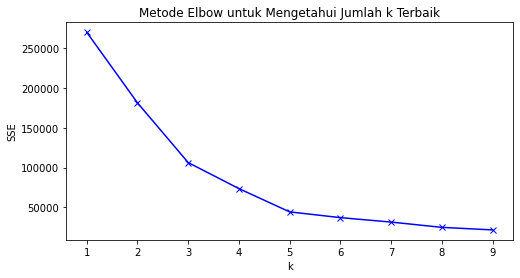

In [15]:
from sklearn.cluster import KMeans
# Implementasi Metode Elbow

# List nilai SSE
sse = []

# Cari k terbaik dari 1-10
K = range(1,10)

# Cek nilai SSE setiap k
for k in K:
 kmeanModel = KMeans(n_clusters=k)
 kmeanModel.fit(X)
 sse.append(kmeanModel.inertia_)


# Plotting the distortions
plt.figure(figsize=(8,4))
plt.plot(K, sse, "bx-")
plt.xlabel("k")
plt.ylabel("SSE")
plt.title("Metode Elbow untuk Mengetahui Jumlah k Terbaik")
plt.show()

Dari plot nilai SSE dengan metode elbow, diketahui bahwa, nilai $k=5$ merupakan jumlah cluster terbaik

In [16]:
# Cek Nilai SSE setiap k
for idx, sse_val in enumerate(sse, start=1):
    print(f'k={idx}; SSE={sse_val}')

k=1; SSE=269981.28
k=2; SSE=181363.59595959596
k=3; SSE=106348.37306211119
k=4; SSE=73679.78903948834
k=5; SSE=44448.45544793371
k=6; SSE=37233.81451071001
k=7; SSE=31648.556137745232
k=8; SSE=25018.78161341407
k=9; SSE=21806.81299869546


In [19]:
# Buat Model KMeans
# Kali ini kita coba menggunakan k=2 - anggap saja kita tidak tahu jumlah label ada 3 :)

from sklearn.cluster import KMeans

# Inisiasi obyek KMeans
cl_kmeans = KMeans(n_clusters=5)

# Fit dan predict model
y_kmeans = cl_kmeans.fit_predict(X)

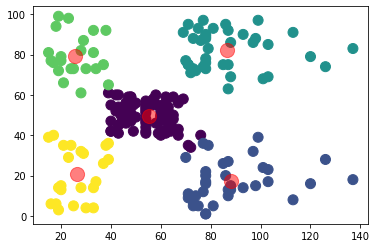

In [20]:
# Plot hasi cluster berdasarkan Sepal Length dan Sepal Width
plt.scatter(X.iloc[:, 0], X.iloc[:, 1], s = 100, c=y_kmeans)

# Plot centroid
centers = cl_kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='red', s=200, alpha=0.5)